<a href="https://colab.research.google.com/github/ahshah322/World-Happiness-Report-2025/blob/main/notebooks/World_Happiness_Report_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project Introduction
In this project, we analyze the World Happiness Report 2025 dataset to explore how various factors such as GDP, social support, health, freedom, generosity, and corruption perception influence a country's overall happiness score.

# 2. Importing Required Libraries
Import essential Python libraries for data manipulation, analysis, and visualization such as pandas, numpy, matplotlib, and seaborn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# 3. Loading the Dataset
Load the WHR_2025 dataset (CSV) into a pandas DataFrame and display the first few rows to understand its structure.

In [3]:
data = pd.read_csv('WHR_2025.csv')

In [4]:
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,South Asia,1.364,1.427,1.301,0.649,0.000,0.155,0.000,0.075,0.135,0.348
1,Albania,Central & Eastern Europe,5.411,5.539,5.284,1.371,1.122,0.696,0.841,0.103,0.057,1.220
2,Algeria,Middle East & North Africa,5.571,5.674,5.469,1.315,1.363,0.782,0.522,0.057,0.219,1.313
3,Argentina,Latin America & Caribbean,6.397,6.492,6.302,1.504,1.622,0.579,0.824,0.048,0.083,1.736
4,Armenia,Commonwealth of Independent States,5.494,5.596,5.391,1.391,1.349,0.828,0.786,0.032,0.158,0.950


In [5]:
data_columns = [
    "Country name",
    "Regional indicator",
    "Ladder score",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
]

In [6]:
data = data[data_columns].copy()

In [7]:
happy_df = data.rename(columns={
    'Country name': 'country_name',
    'Regional indicator': 'regional_indicator',
    'Ladder score': 'happiness_score',
    'Explained by: Log GDP per capita': 'log_gdp_per_capita',
    'Explained by: Social support': 'social_support',
    'Explained by: Healthy life expectancy': 'healthy_life_expectancy',
    'Explained by: Freedom to make life choices': 'freedom_to_make_life_choices',
    'Explained by: Generosity': 'generosity',
    'Explained by: Perceptions of corruption': 'perceptions_of_corruption'
})

In [8]:
happy_df.head()

,country_name,regional_indicator,happiness_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,South Asia,1.364,0.649,0.000,0.155,0.000,0.075,0.135
1,Albania,Central & Eastern Europe,5.411,1.371,1.122,0.696,0.841,0.103,0.057
2,Algeria,Middle East & North Africa,5.571,1.315,1.363,0.782,0.522,0.057,0.219
3,Argentina,Latin America & Caribbean,6.397,1.504,1.622,0.579,0.824,0.048,0.083
4,Armenia,Commonwealth of Independent States,5.494,1.391,1.349,0.828,0.786,0.032,0.158


In [9]:
happy_df.isnull().sum()

,0
country_name,0
regional_indicator,0
happiness_score,0
log_gdp_per_capita,0
social_support,0
healthy_life_expectancy,1
freedom_to_make_life_choices,1
generosity,0
perceptions_of_corruption,1


In [10]:
happy_df = happy_df.dropna()

In [11]:
happy_df.isnull().sum()

,0
country_name,0
regional_indicator,0
happiness_score,0
log_gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0


In [12]:
# Total countries

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central & Eastern Europe                      19
Commonwealth of Independent States             9
East Asia                                      6
Latin America & Caribbean                     21
Middle East & North Africa                    16
North America & ANZ                            4
South Asia                                     6
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                18


# 4. GDP vs. Happiness
Investigate how economic prosperity affects overall happiness scores.

Text(0, 0.5, 'GDP per capita')

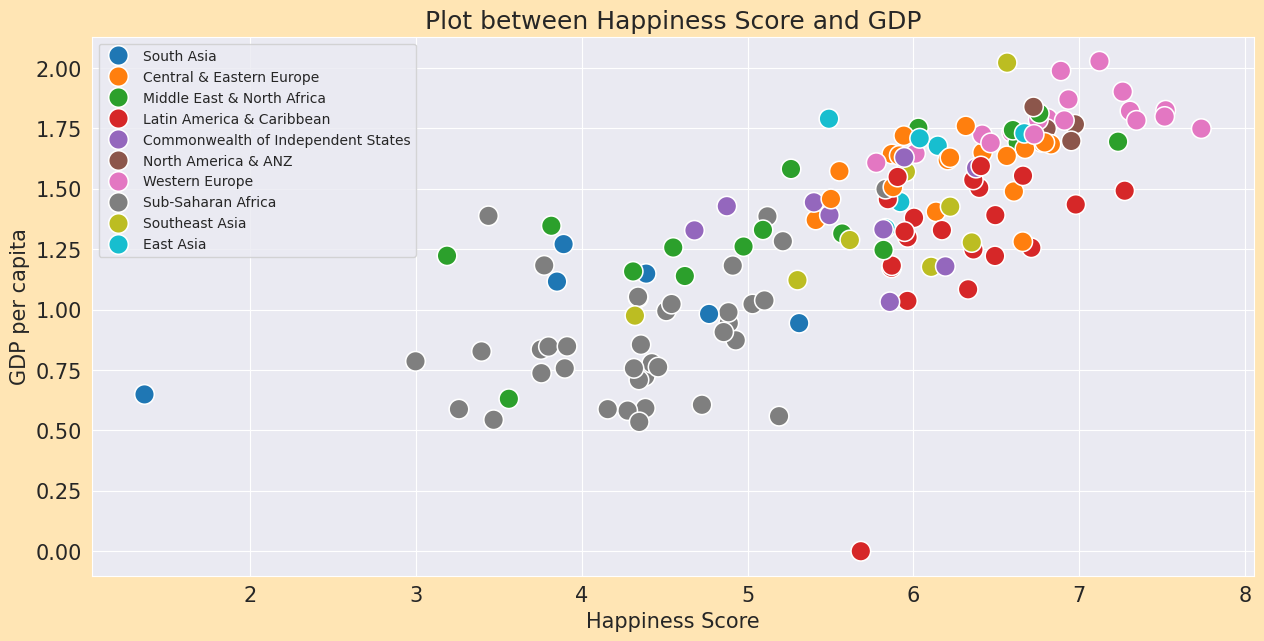

In [13]:
# Plot b/w Happiness and GDP

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.log_gdp_per_capita, hue = happy_df.regional_indicator, s = 200)

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

# 5. Regional GDP Contribution

This visualization illustrates how total GDP per capita is distributed among different world regions. By displaying each region’s share as a percentage, the chart highlights regional disparities in economic prosperity and helps identify areas with higher or lower economic output.

In [14]:
gdp_region = happy_df.groupby('regional_indicator')['log_gdp_per_capita'].sum()
gdp_region

,log_gdp_per_capita
regional_indicator,
Central & Eastern Europe,30.114
Commonwealth of Independent States,12.350
East Asia,9.688
Latin America & Caribbean,27.046
Middle East & North Africa,22.183
North America & ANZ,7.053
South Asia,6.111
Southeast Asia,11.908
Sub-Saharan Africa,31.581


Text(0, 0.5, '')

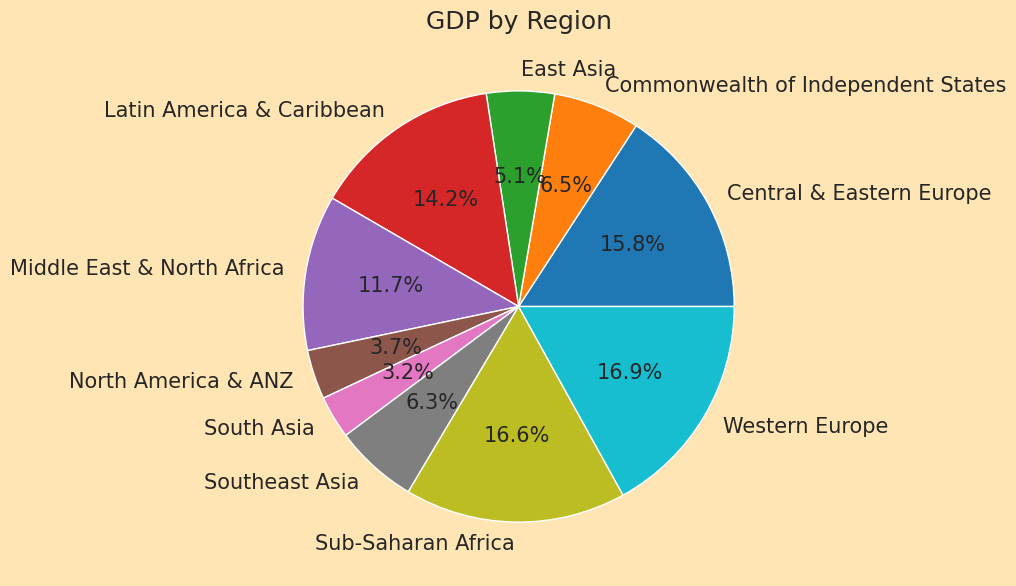

In [15]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

# 6. Correlation Heatmap of Happiness Factors

This heatmap visualizes the relationships between various numerical indicators in the World Happiness Report 2025 dataset.  
By displaying Pearson correlation coefficients, it helps identify which factors — such as GDP, social support, health, freedom, generosity, and perceptions of corruption — are most strongly associated with overall happiness scores.  
Darker shades indicate stronger positive or negative correlations, offering valuable insights into the key drivers of happiness across countries.

<Axes: >

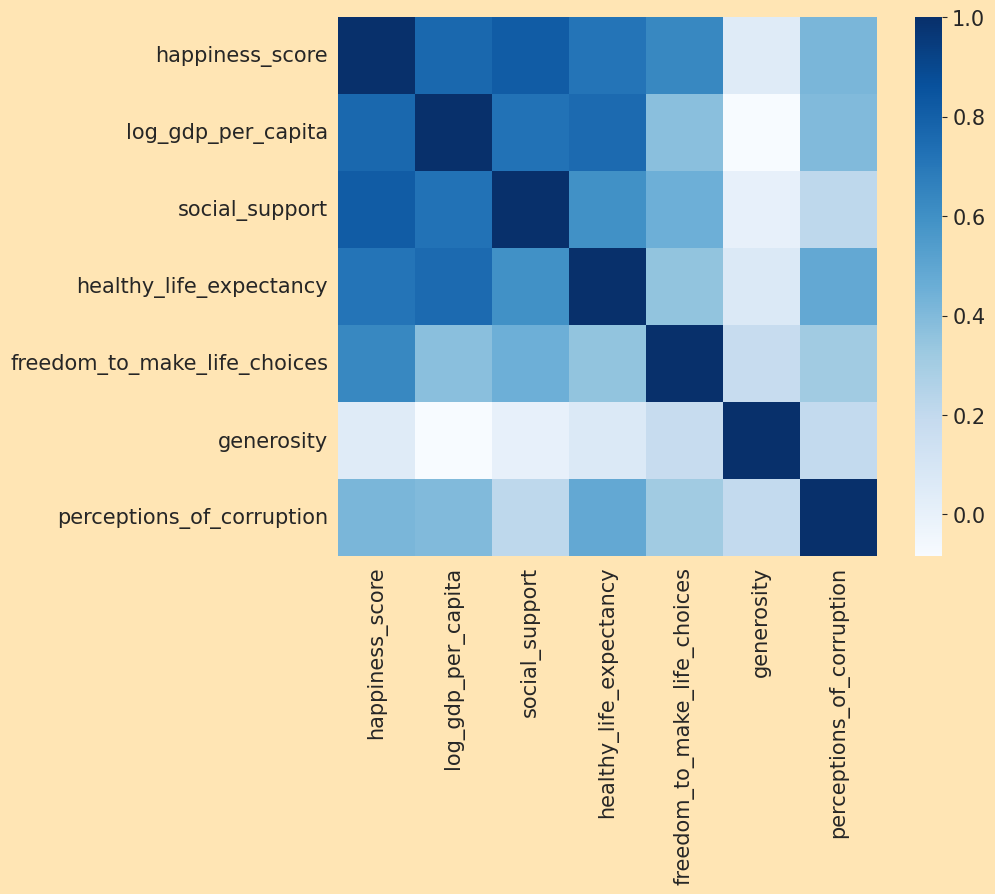

In [30]:
# Correlation Map

# Select only numeric columns
numeric_df = happy_df.select_dtypes(include=['number'])

# Compute correlation matrix
cor = numeric_df.corr(method='pearson')
f, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
cmap="Blues", square=True, ax=ax)

# 7. Perception of Corruption Across Regions

This bar chart compares the average perception of corruption among different world regions.  
It highlights how citizens’ trust in public institutions varies globally, with higher index values indicating a greater perception of corruption.  
Analyzing these differences helps reveal how governance quality and institutional transparency influence overall happiness levels within each region.

In [17]:
# corruption in regions
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central & Eastern Europe,0.090368
Commonwealth of Independent States,0.119222
East Asia,0.186500
Latin America & Caribbean,0.101286
Middle East & North Africa,0.139750
North America & ANZ,0.299500
South Asia,0.092833
Southeast Asia,0.156000
Sub-Saharan Africa,0.113000


<BarContainer object of 10 artists>

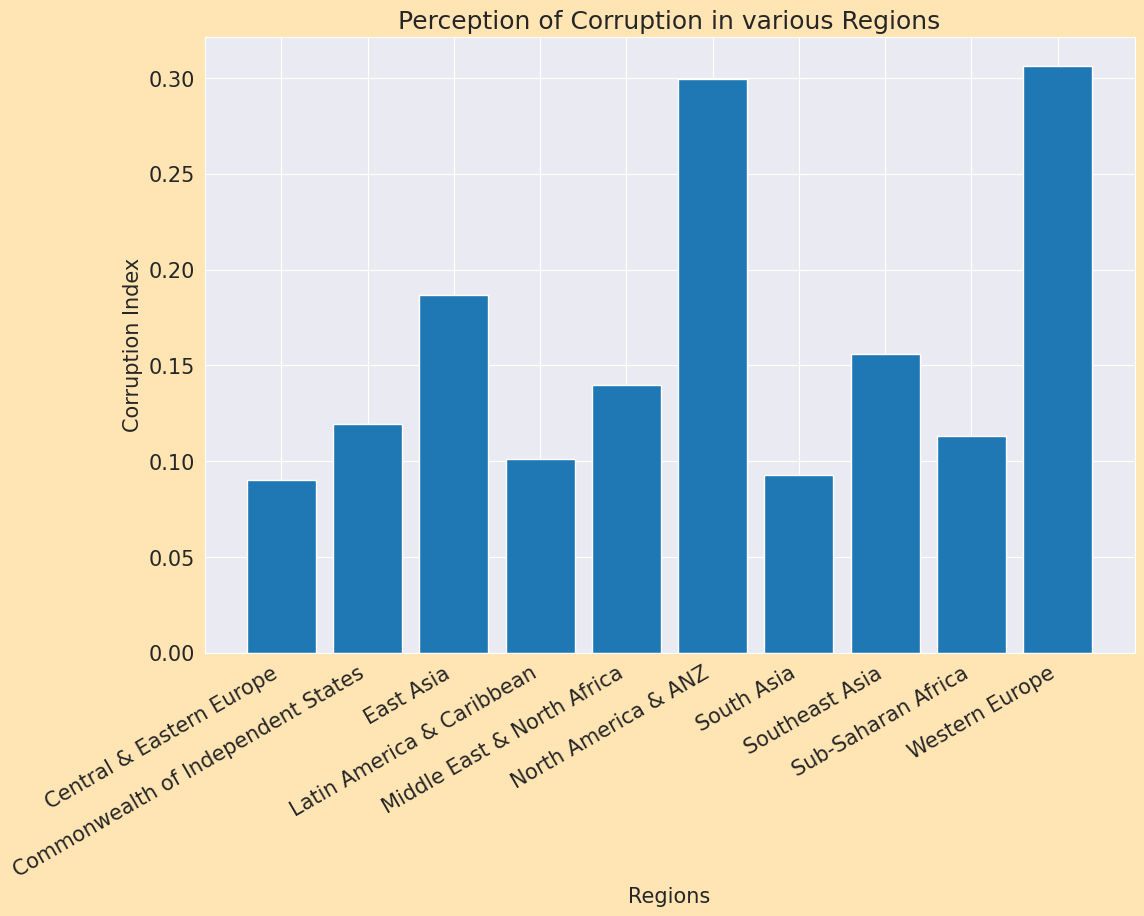

In [18]:
plt.rcParams['figure.figsize'] = (12, 8)
plt. title('Perception of Corruption in various Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

# 8. Life Expectancy Comparison — Top vs Bottom 10 Happiest Countries

This section compares the **healthy life expectancy** between the world’s top 10 happiest and bottom 10 least happy countries, as reported in the World Happiness Report 2025.  
By visualizing these two extremes side by side, the chart highlights how longer, healthier lives often align with higher happiness scores.  
The difference also reveals the strong connection between public health standards and citizens’ overall well-being — countries with better healthcare, lifestyle, and social conditions tend to achieve greater happiness.

In [19]:
# Select Top 10 and Bottom 10 countries by Happiness Score
top_10 = happy_df.sort_values("happiness_score", ascending=False).head(10).reset_index(drop=True)
bottom_10 = happy_df.sort_values("happiness_score", ascending=True).head(10).reset_index(drop=True)

# Multiply life expectancy values by 100 for full numbers
top_10["healthy_life_expectancy"] = top_10["healthy_life_expectancy"] * 100
bottom_10["healthy_life_expectancy"] = bottom_10["healthy_life_expectancy"] * 100

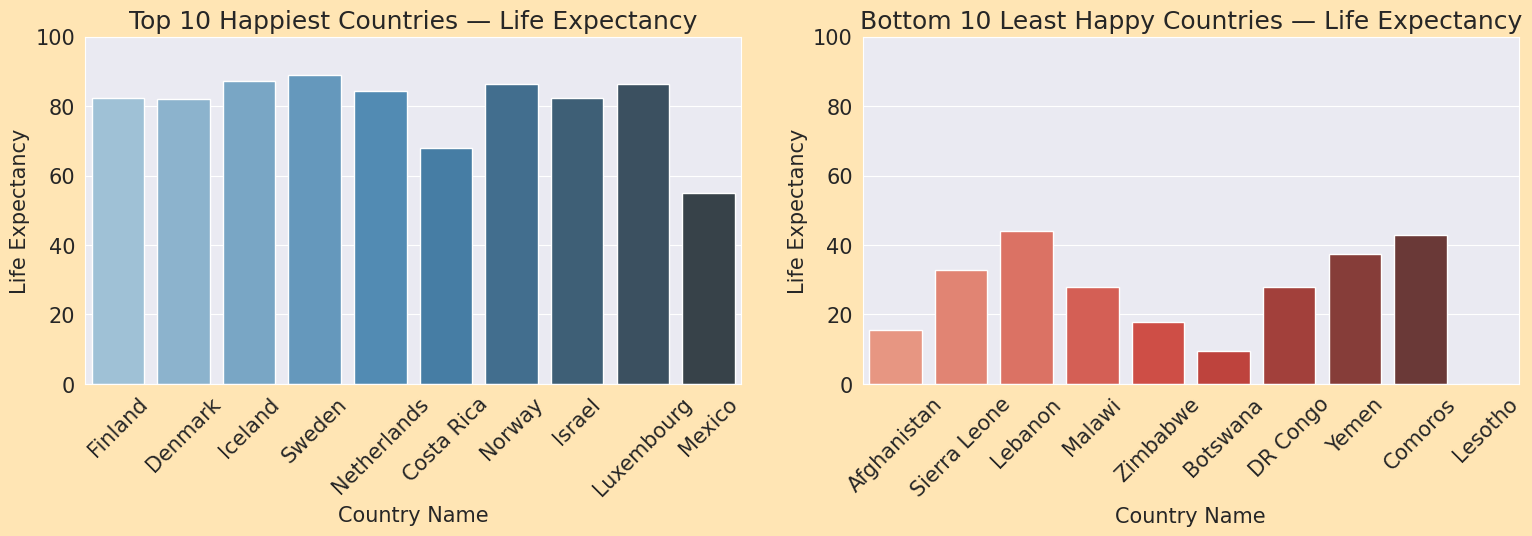

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 happiest countries ---
sns.barplot(
    x="country_name",
    y="healthy_life_expectancy",
    hue="country_name",
    data=top_10,
    ax=axes[0],
    palette="Blues_d",
    legend=False
)
axes[0].set_title("Top 10 Happiest Countries — Life Expectancy")
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(0, 100)

# Plot 2: Bottom 10 least happy countries ---
sns.barplot(
    x="country_name",
    y="healthy_life_expectancy",
    hue="country_name",
    data=bottom_10,
    ax=axes[1],
    palette="Reds_d",
    legend=False
)
axes[1].set_title("Bottom 10 Least Happy Countries — Life Expectancy")
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout(pad=2)
plt.show()

# 9. Freedom of Life Choices vs. Happiness Score

This scatter plot illustrates the relationship between **freedom to make life choices** and the **overall happiness score** across different regions.  
Each point represents a country, with colors distinguishing regions. The visualization highlights how greater personal and social freedom often correlates with higher happiness levels.  
Regions with stronger democratic values and individual autonomy generally appear toward the upper end of the happiness scale, emphasizing the importance of personal freedom as a key contributor to well-being.

Text(0, 0.5, 'Happiness Score')

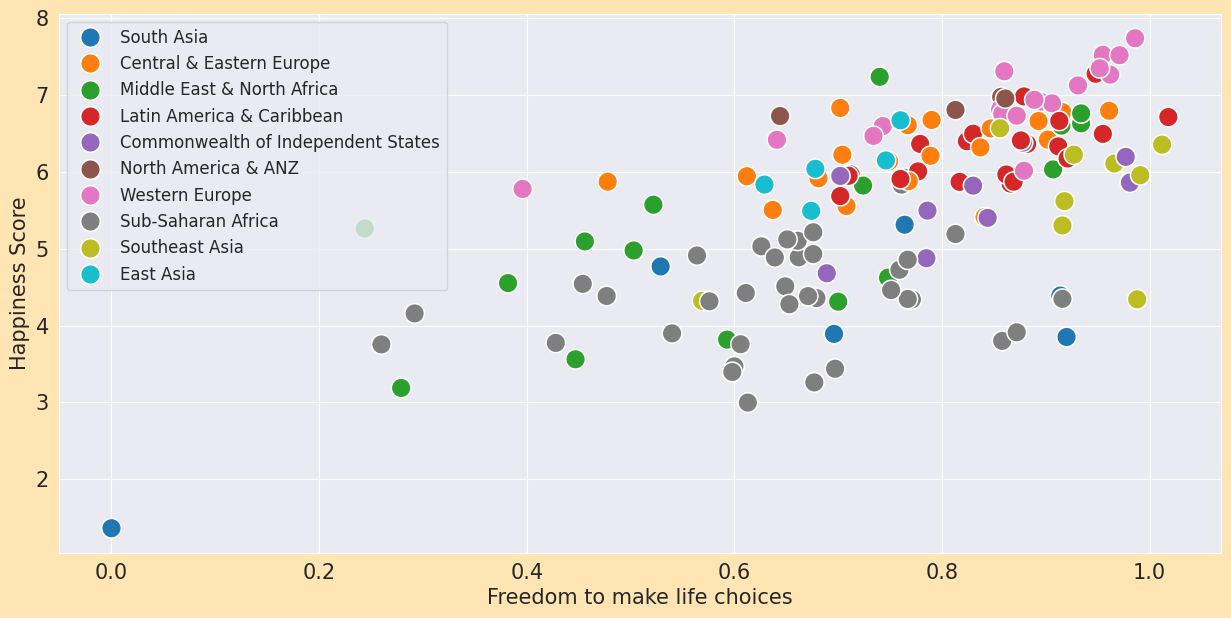

In [21]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x= happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score, hue= happy_df.regional_indicator, s =200)
plt.legend(loc= 'upper left', fontsize= '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

# 10. Top 10 Most Corrupt Countries (Lowest Perception Index)

This bar chart highlights the ten countries with the **lowest perception of corruption index**, indicating the **highest perceived levels of corruption**.  
A lower index value suggests that citizens have less trust in their institutions and governance systems.  
This visualization helps reveal global disparities in transparency and governance quality, emphasizing how corruption perceptions can negatively affect public trust, economic growth, and overall happiness.

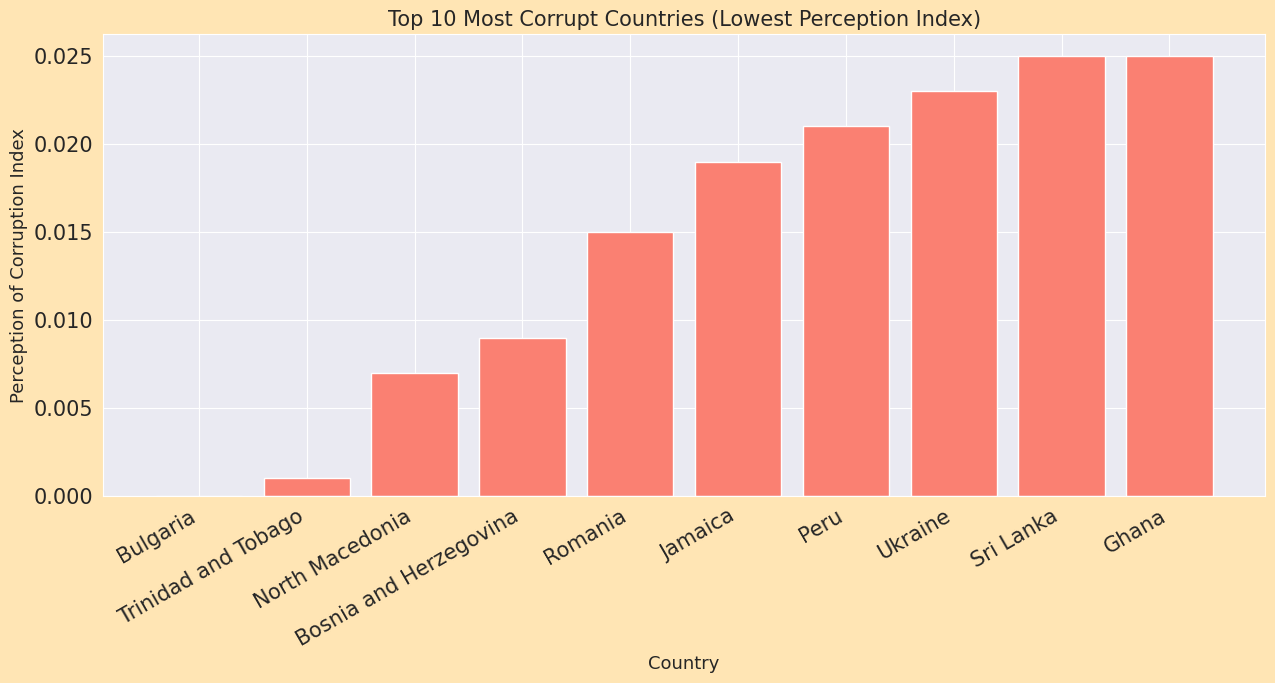

In [22]:
# Top 10 most corrupt countries (lowest perception index)
most_corrupt = happy_df.sort_values(by='perceptions_of_corruption', ascending=True).head(10)

plt.figure(figsize=(15,6))
plt.bar(most_corrupt.country_name, most_corrupt.perceptions_of_corruption, color='salmon')
plt.title('Top 10 Most Corrupt Countries (Lowest Perception Index)', fontsize=15)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Perception of Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.show()

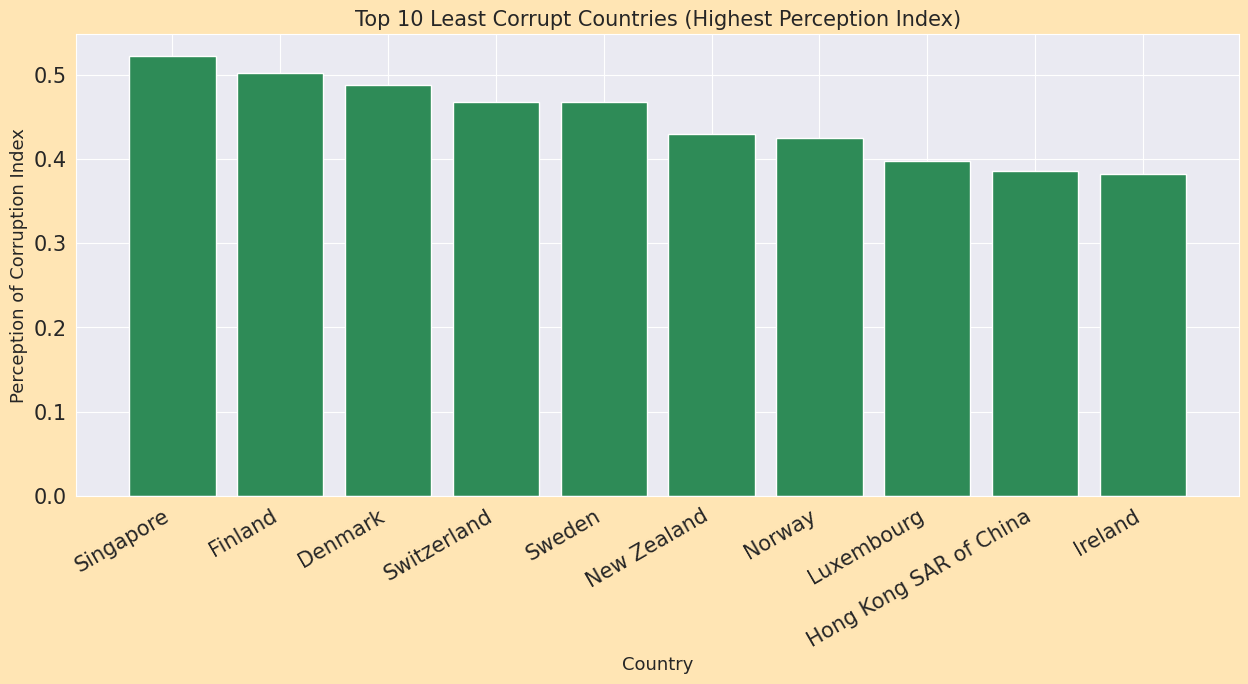

In [23]:
# Top 10 least corrupt countries (highest perception index)
least_corrupt = happy_df.sort_values(by='perceptions_of_corruption', ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(least_corrupt.country_name, least_corrupt.perceptions_of_corruption, color='seagreen')
plt.title('Top 10 Least Corrupt Countries (Highest Perception Index)', fontsize=15)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Perception of Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.show()

# 11. Top 10 Least Corrupt Countries (Highest Perception Index)

This bar chart showcases the ten countries with the **highest perception of corruption index**, representing the **lowest perceived levels of corruption**.  
Higher index values reflect greater institutional integrity, transparency, and trust in public governance.  
These nations often demonstrate strong rule of law, effective accountability systems, and ethical leadership — all of which contribute to higher happiness sc


Text(0, 0.5, 'Corruption')

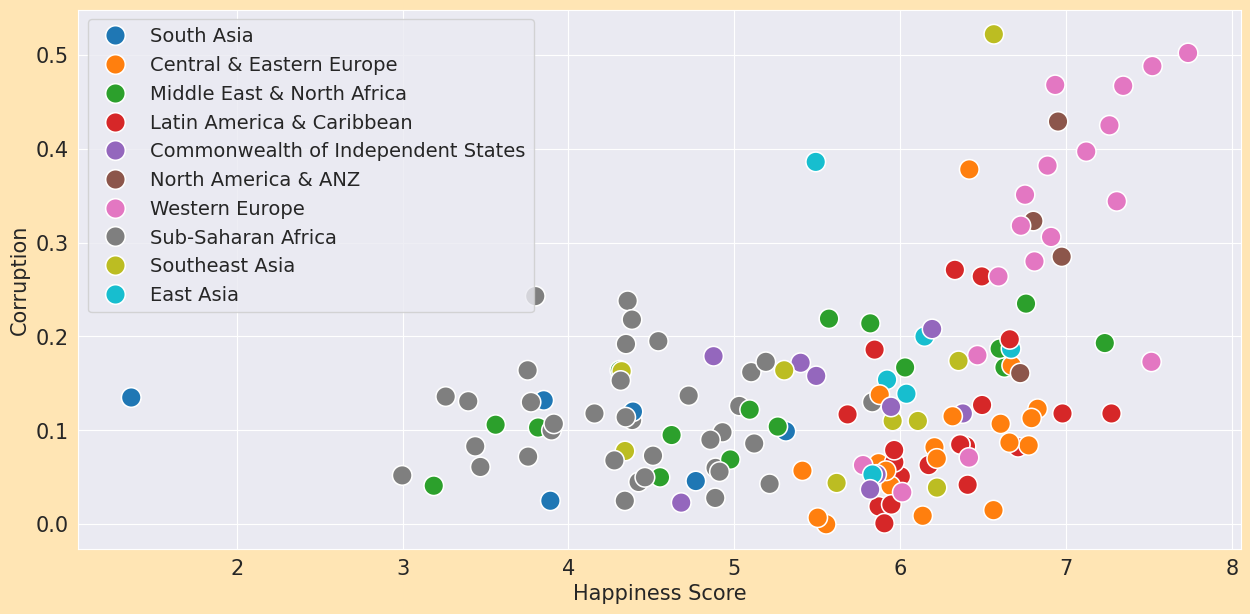

In [24]:
# corruption vs happiness
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = happy_df.happiness_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s =200)
plt.legend(loc='upper left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')